<a id="top"></a>  
# Confidence Intervals with z-score and t-score
This notebook contains Python code for calculating the confidence intervals with z-score and t-score, given various confidence levels.  Brief overviews of **inferential statistics**, **descriptive statistics** and **miscellaneous statistics topics** are also included.


### Inferential Statistics and Confidence Intervals
1. [Inferential Statistics](#infer)<br>
    [1.1  Overview](#infer_over) - standardization, central limit theorem, standard error, etc.<br>
    [1.2  Confidence Interval](#infer_confint)<br>
    [1.3  Test Statistics:  z-score and t-score](#infer_test)<br>
    [1.4  Confidence Interval with Z-Statistics](#infer_zscore) - confidence level, alpha, z-score<br>
    [1.5  Confidence Interval with T-Statistics](#infer_tscore) - confidence level, alpha, t-score<br>

### Descriptive Statistics
2. [Descriptive Statistics](#desc)<br>
    [2.1  Frequency Distribution Table](#desc_fdt)<br>
    [2.2  Measure of Central Tendency](#desc_cent) - mean, median, mode, skew and kurtosis<br>
    [2.3  Measure of Dispersion](#desc_disp) - variance and standard deviation<br>
    [2.4  Covariance](#desc_covar)<br>
    [2.5  Correlation Coefficient](#desc_corr)<br>

###  Miscellaneous Statistics Topics
3. [Miscellaneous Statistics Topics](#over)<br>
    [3.1  Data, Information, Knowledge, Wisdom](#over_data)<br>
    [3.2  Types of Statistics](#over_stat)<br>
    [3.3  Population and Sample](#over_pop)<br>
    [3.4  Types of Data](#over_type)<br>
    [3.5  Levels of Measurements of Data](#over_meas)<br>
    [3.6  Types of Distributions](#over_dist)<br>
<br>
---

**Please upvote if you found this helpful :-)**

####  Import Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import random
import math
import scipy.stats as stats
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

#  Kaggle directories
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

heart = pd.read_csv('../input/heart-disease-uci/heart.csv')
heart.shape

/kaggle/input/heart-disease-uci/heart.csv
heart-disease-uci



(303, 14)

[go to top of section](#over)<br>
[go to top](#top)<br>

---
<a id="infer"></a>
#  1. Inferential Statistics
**INFERENTIAL STATISTICS** refers to methods that rely on probability theory and distributions in particular to predict population values based on sample data.

[3.1  Overview](#infer_over) - standardization, central limit theorem, standard error<br>
[3.2  Confidence Interval](#infer_confint)<br>
[3.3  Test Statistics:  z-score and t-score](#infer_test)<br>
[3.4  Confidence Interval with Z-Statistics](#infer_zscore) - alpha, z-score, CI<br>
[3.5  Confidence Interval with T-Statistics](#infer_tscore) - alpha, t-score, CI<br>

| **symbols** | **description** | **symbols** | **description**   |
| :--- | :--- | :--- | :--- |
| $\mathsf{\large N}$     |  population size | $\mathsf{\large CL}$ | confidence level |
| $\mathsf{\large n}$     |  sample size |  $\mathsf{\large CI}$ | confidence interval |
| $\mathsf{\large \mu}$     |  population mean | $\mathsf{\large Z}$ | standard normal distribution variable |
| $\mathsf{\large \bar{x}}$     |  sample mean | $\mathsf{\large \alpha}$ | significance level |
| $\mathsf{\large \sigma^2}$ | population variance | $\mathsf{\large z_{\alpha/2}}$ | critical value from z-table, two-tailed |
| $\mathsf{\large s^2}$ | sample variance |  $\mathsf{\large t_{\alpha/2}}$ | critical value from t-table, two-tailed |
| $\mathsf{\large \sigma}$ | population standard deviation | $\mathsf{\large SE}$ | standard error |
| $\mathsf{\large s}$ | sample standard deviation | $\mathsf{\large ddof}$ | degrees of freedom (n-1) |
| $\mathsf{\large x_i}$  |  observation |||

[go to top of section](#infer)<br>
<a id="infer_over"></a>
##  1.1  Overview
The overview section will cover the basic topics related to understanding inferential statistics.

###  1.1.1  Normal Distribution
Normal Distribution graph is symmetrical and it’s mean, median and mode are equal (no skew).  It is denoted by:<br>
\begin{align*} 
\mathsf{\text{N} \sim (\mu, \sigma^2)}
\end{align*}
*  Change in $\mu$ will move the curve left or right.
*  Change in $\sigma$ will narrow (lower $\sigma$) or flatten (higher $\sigma$) the curve.
<br>The Normal distribution approximates a wide number of random variables. However, not all random variables follow a Normal distribution.

###  1.1.2  Standardization
Standardization is the process of transforming ($\mu,\sigma^2$) to one with a mean zero and a standard deviation of one (0,1).  Every distribution can be standardized  and the sampling distribution is denoted by:
\begin{align*} 
\mathsf{\text{Sampling Distribution} = \frac{\sigma}{\sqrt{n}} \quad \text{for N} \sim (\mu,\frac{\sigma^2}{n}), \quad \text{where n > 30}}
\end{align*}
Z-Score helps us find the standard normal distribution from any normally distributed dataset.
\begin{align*} 
\mathsf{\text{Z-Score:} \quad Z = \frac{x-\mu)}{\sigma} \sim N(0,1)}
\end{align*}

###  1.1.3  Central Limit Theorem
The Central Limit Theorem (CLT for short) basically says that for non-normal data, the distribution of the sample means has an approximate normal distribution, as long as the sample size is large enough (usually at least 30) and all samples have the same size. 

###  1.1.4  Standard Error
The standard error is the approximate standard deviation of a statistical sample population.  The more data points involved in the calculations of the mean, the smaller the standard error tends to be.  It is given by:
\begin{align*} 
\mathsf{\text{SE} = \frac{\sigma}{\sqrt{n}}}
\end{align*}

###  1.1.5  Estimators and Estimates
Estimators are variables that provide a means to estimate some parameter.  Estimates are the actual results of the estimator calculations.  Following table shows the estimators and estimates:

| term | parameter | **ESTIMATOR** |  **ESTIMATE** |
| :--- | :--- | :--- | :--- |
|mean	| $\mu$ | $\bar{x}$ |  51.2 |
|variance | $\sigma^2$ | $s^2$  | 9.2 |
|correlation | $\rho$ | R | .85 |

[go to top of section](#infer)<br>
<a id="infer_confint"></a>
##  1.2  Confidence Interval
The concept of Confidence Interval was introduced by Polish mathematician and statistician, Jerzy Neyman in 1937 and is very important in statistics, particularly in hypothesis testing.  A confidence interval calculates the probability that a population parameter will fall between an upper and lower interval.  It is a simply way to measure how well a sample represents the population being studied.

|  | **point<br>estimator** | **test<br>statistics** | **standard<br>error** |
| :--- | :---: | :---: | :---: |
| **Confidence Interval** | $\mathsf{ \large \bar{x}}$ | $\mathsf{\large \pm z_{\alpha/2}}$ | $\mathsf{ \large \times \large \frac{s}{\sqrt{n}}}$ |

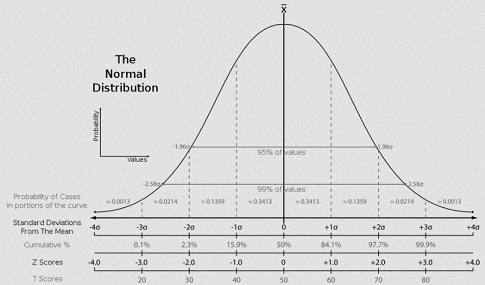

The confidence interval is expressed as a percentage (the most frequently quoted percentages are 90%, 95%, and 99%). The percentage reflects the **confidence level**.

[go to top of section](#infer)<br>
<a id="infer_test"></a>
##  1.3  Test Statistics:  z-score and t-score
Two types of test statistics used for calculating the confidence intervals are:

-  **z-statistics (z-score)** is used when the data follows a normal distribution, population standard deviation ($\large \sigma$) is known and the sample size is above 30.  Z-Score tells you how many standard deviations from the mean your result is.  The z-score is calculated using the formula:
<br>
\begin{align*} 
\mathsf{ \large \text{z-score} = \frac{\bar{x}-\mu}{\sigma}}
\end{align*}
<br>
-  **t-statistics (t-score)**, also known as **Student's T-Distribution**, is used when the data follows a normal distribution, population standard deviation ($\large \sigma$) is **NOT** known, but the sample standard deviation ($\large \text{s}$) is known or can be calculated, and the sample size is below 30.  T-Score tells you how many standard deviations from the mean your result is.  The t-score is calculated using the formula:
<br>
\begin{align*} 
\mathsf{ \large \text{t-score} = \frac{\bar{x}-\mu}{s/\sqrt{n}}}
\end{align*}
<br><br>

**Summary:** If the sample sizes are larger than 30, the z-distribution and the t-distributions are pretty much the same and either one can be used.  If the population standard deviation is available and the sample size is greater than 30, t-distribution can be used with the population standard deviation instead of the sample standard deviation.

| test<br>statistics | lookup<br>table | lookup<br>values | critical<br>value |normal<br>distribution |  population<br>standard<br>deviation ($\large \sigma$) | sample<br>size |
| :--- | :--- | :--- | :--- | :---: | :---: | :---: |
| z-statistics | z-table | z-score | z-critical is z-score at a specific confidence level |yes | known | > 30 |
| t-statistics | t-table | t-score | t-critical is t-score at a specific confidence level |yes | not known | < 30 |

<br><br>
Python **Percent Point Function** is used to calculate the critical values at a specific confidence level:
- **z-critical** `= stats.norm.ppf(1 - alpha)`
- **t-critical** `= stats.t.ppf(alpha/numOfTails, ddof)`

[go to top of section](#infer)<br>
<a id="infer_zscore"></a>
##  1.4  Confidence Interval with Z-Statistics
**Given:**
-  population variance, $\sigma^2$, is given
-  confidence level of the interval:  95% (two-tailed) and 99% (two-tailed)

**Assumptions:**
-  population variance is given
-  population is normally distributed, even if it is not
-  sample size is large (>30)

**Formula:**
\begin{align*} 
\mathsf{\text{Confidence Interval (z-score)} = \left[ \bar{x} - z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}, \bar{x}+z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}} \right]}
\end{align*}

---

####  CALCULATION STEPS:
**1.  Calculate Sample Mean, Standard Deviation and Standard Error:**
*  calculate sample mean, $\bar{x}$
*  calculate standard deviation, $\sigma$ 
*  calculate standard error, $\sigma/\sqrt{n}$ 

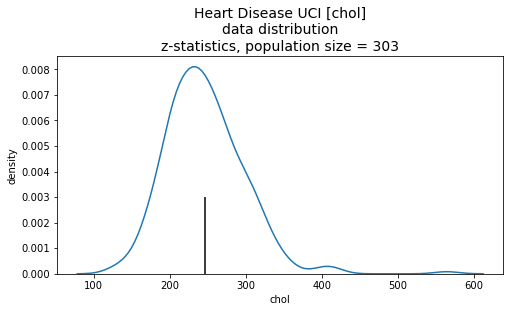

mean:			246.2640
standard deviation:	51.8308
standard error:		2.9776


In [2]:
#  DATA - Heart Disease UCI, Cholesterol
#  plot the data
plt.figure(figsize=(8,4))
plt.title('Heart Disease UCI [chol]\ndata distribution\nz-statistics, population size = {}'.format(len(heart['chol'])), fontsize=14)
plt.xlabel('observations')
plt.ylabel('density')
plt.vlines(np.mean(heart['chol']),0,0.003)
sns.distplot(heart['chol'], hist=False)
plt.show()

#  mean, standard deviation and standard error
mean  = np.mean(heart['chol'])           # mean
sigma = statistics.stdev(heart['chol'])  # standard deviation
sem   = stats.sem(heart['chol'])         # standard error


print('mean:\t\t\t{:.4f}'.format(mean))
print('standard deviation:\t{:.4f}'.format(sigma))
print('standard error:\t\t{:.4f}'.format(sem))


**2.  Critical Value lookup in z-table**

| Confidence Level | 95% | 99% | notes |
| :--- | :---: | :---: | :--- |
| 1.  Significance Level $\alpha$ | 1-0.95=0.05 | 1-0.99=0.01 | $\alpha$ = (1 - confidence level) |
| 2.  Significance Level $\alpha/2$ | 0.05/2 = 0.025 | 0.01/2 = 0.005 | two-tailed |
| 3.  value to lookup in Z-table | 1-0.025 = 0.975 | 1-0.005 = 0.995 | www.ztable.net |
| 4.  critical value | 1.9 + 0.6 = 1.96 | 2.5+(0.07+0.08)/2 = 2.575 | z-critical |

<br>

*  Calculate significance level: $\alpha$ = (1 - confidence interval)/# of tails
*  Z-Table lookup value is (1 - $\alpha$)
*  Look for (1 - $\alpha$) value in the body of the table
*  Find the y-axis value, then the x-axis value (round x-axis value if needed)
*  Critical value =  y-axis value + x-axis value

NOTE:  Python function `stats.norm.ppf(1 - alpha)` is used to calculate z-critical.

In [3]:
confidenceLevel = .90
numOfTails      = 2
alpha           = (1 - confidenceLevel)/numOfTails

#  Percent Point Function
#  - calculates z-critical from (1-alpha)
z_critical = stats.norm.ppf(1 - alpha)

print('Step 2a:  Calculate z-critical for Confidence Level {:.0%} with {} tails.'.format(confidenceLevel,numOfTails))
print('Confidence Level:\t{:.0%}'.format(confidenceLevel))
print('Number of Tails:\t{}'.format(numOfTails))
print('alpha:\t\t\t{:.4f}'.format(alpha))
print('z-critical value:\t{:.4f}  <---'.format(z_critical))

Step 2a:  Calculate z-critical for Confidence Level 90% with 2 tails.
Confidence Level:	90%
Number of Tails:	2
alpha:			0.0500
z-critical value:	1.6449  <---


In [4]:
print('\nStep 2b:  Calculate z-critical for Confidence Levels with 1 and 2 tails.')

#--- func for critical value ---
def z_crit(cl,tail):
    alpha = (1-cl)/tail
    z_critical = stats.norm.ppf(1 - alpha)
    print('CL {:.0%}'.format(cl), end="")
    print('  tail {}'.format(tail), end="")
    print('  alpha {:.4f}'.format(alpha), end="")
    print('\t-->  z-critical:  {:.4f}'.format(z_critical))
    return

#  Confidence Levels at 75%, 90% and 99% with 1 or 2 tails
confidenceLevel = [.75, .90, .99]
numOfTails      = [1,2]

for i in confidenceLevel:
    for j in numOfTails:
        z_crit(i,j)


Step 2b:  Calculate z-critical for Confidence Levels with 1 and 2 tails.
CL 75%  tail 1  alpha 0.2500	-->  z-critical:  0.6745
CL 75%  tail 2  alpha 0.1250	-->  z-critical:  1.1503
CL 90%  tail 1  alpha 0.1000	-->  z-critical:  1.2816
CL 90%  tail 2  alpha 0.0500	-->  z-critical:  1.6449
CL 99%  tail 1  alpha 0.0100	-->  z-critical:  2.3263
CL 99%  tail 2  alpha 0.0050	-->  z-critical:  2.5758


**3.  Calculate the Confidence Intervals**
<br>Plug in critical value, sample mean and standard error in the confidence intervals formula.

|  | **point<br>estimator** | **test<br>statistics** | **standard<br>error** |
| :--- | :---: | :---: | :---: |
| **Confidence Interval** | $\mathsf{ \large \bar{x}}$ | $\mathsf{\large \pm \quad z_{\alpha/2}}$ | $\mathsf{ \large \times \quad \large \frac{\sigma}{\sqrt{n}}}$ |
| | sample mean | critical value | standard error |


**NOTE:**  Python requires the `standard deviation`, instead of `standard error`, to calculate the confidence interval correctly.  For explanation see: https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy

In [5]:
confidenceLevel = .95
numOfTails      = 2
alpha           = (1 - confidenceLevel)/numOfTails
z_critical      = stats.norm.ppf(1 - alpha)

# confidence interval formula (manual)
lowerCI = mean - (z_critical * sigma)
upperCI = mean + (z_critical * sigma)

#  print confidence intervals
print('Confidence Level:\t{:.0%}'.format(confidenceLevel))
print('Number of Tails:\t{}'.format(numOfTails))
print('alpha:\t\t\t{:.4f}'.format(alpha))
print('z-critical value:\t{:.4f}  <---'.format(z_critical))
print('\nConfidence Interval:\nlower CI\t\t{:.4f}'.format(lowerCI))
print('upper CI:\t\t{:.4f}'.format(upperCI))

Confidence Level:	95%
Number of Tails:	2
alpha:			0.0250
z-critical value:	1.9600  <---

Confidence Interval:
lower CI		144.6776
upper CI:		347.8504


**4.  Plotting Confidence Interval for Confidence Level of 95%**
<br>Density plots are used to show the confidence intervals.

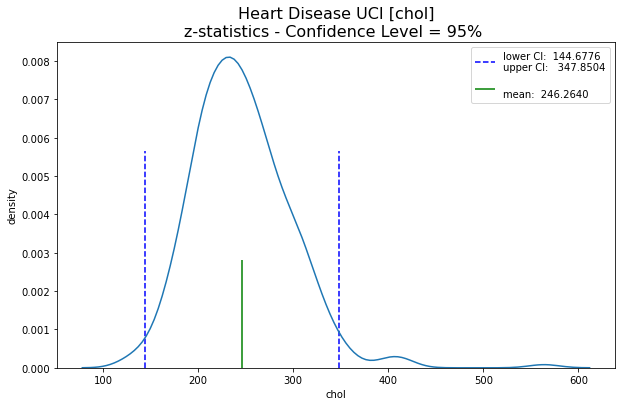

Z-Statistics - CONCLUSION:
95% of the total patients in the Heart Disease UCI dataset will have cholesterol levels between 144 and 348.


In [6]:
#  PLOT CONFIDENCE INTERVAL
plt.figure(figsize=(10,6))
plt.title('Heart Disease UCI [chol]\nz-statistics - Confidence Level = {:.0%} '.format(confidenceLevel), fontsize=16)
plt.xlabel('cholesterol level')
plt.ylabel('density')

labelCI=("lower CI:  {:.4f}\nupper CI:   {:.4f}".format(lowerCI,upperCI))
labelME=("\nmean:  {:.4f}".format(mean))
plt.vlines([lowerCI,upperCI],0,np.mean(stats.norm.pdf(heart['chol'], loc=mean, scale=sigma)),label=labelCI,color='blue',ls='--')
plt.vlines(mean,0,np.mean(stats.norm.pdf(heart['chol'], loc=mean, scale=sigma)*.5),label=labelME,color='green')
plt.legend(loc='best')

sns.distplot(heart['chol'], hist=False)
plt.show()


print("Z-Statistics - CONCLUSION:")
print("{:.0%} of the total patients in the Heart Disease UCI dataset will have cholesterol levels between {} and {}.".format(confidenceLevel, math.floor(lowerCI), math.ceil(upperCI)))

[go to top of section](#infer)<br>
<a id="infer_tscore"></a>
##  1.5  Confidence Interval with T-Statistics
**Given:**
-  confidence level of the interval:  95% (two-tailed) and 99% (two-tailed)

**Assumptions:**
-  population variance is given
-  population is normally distributed, even if it is not
-  sample size is 20 (<30)
-  population variance, $\sigma^2$, is NOT given

**Formula:**
\begin{align*} 
\mathsf{\text{Confidence Interval (t-score)} = \left[ \bar{x} - t_{n-1,\alpha/2} \times \frac{s}{\sqrt{n}}, \bar{x}+t_{n-1,\alpha/2} \times \frac{s}{\sqrt{n}} \right]}
\end{align*}

---

####  CALCULATION STEPS:
**1.  Calculate Sample Mean, Standard Deviation and Standard Error:**
*  calculate sample mean, $\bar{x}$
*  calculate standard deviation, $\sigma$ 
*  calculate standard error, $\sigma/\sqrt{n}$ 

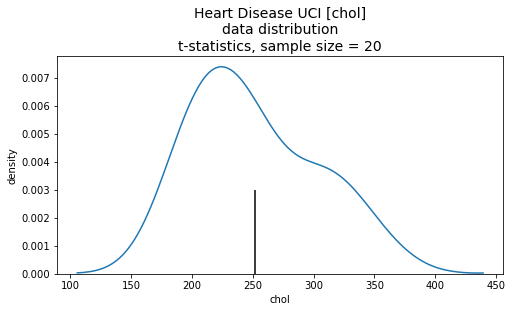

mean:			251.5000
standard deviation:	49.5235
standard error:		11.0738


In [7]:
#  DATA - Heart Disease UCI, Cholesterol - sample
n = 20
heart_chol_sample = heart['chol'].sample(n)

#  plot the data
plt.figure(figsize=(8,4))
plt.title('Heart Disease UCI [chol]\ndata distribution\nt-statistics, sample size = {}'.format(len(heart_chol_sample)), fontsize=14)
plt.ylabel('density')
plt.vlines(np.mean(heart_chol_sample),0,.003)
sns.distplot(heart_chol_sample, hist=False)
plt.show()


#  mean, standard deviation and standard error
mean  = np.mean(heart_chol_sample)           # mean
s     = statistics.stdev(heart_chol_sample)  # standard deviation
sem   = stats.sem(heart_chol_sample)         # standard error

print('mean:\t\t\t{:.4f}'.format(mean))
print('standard deviation:\t{:.4f}'.format(s))
print('standard error:\t\t{:.4f}'.format(sem))


**2.  Critical Value lookup in t-table**

| Confidence Level | 95% | 99% | notes |
| :--- | :---: | :---: | :--- |
| 1.  Degree of Freedom, 20-1 | 19 | 19 | sample size, n = 20 |
| 2.  Significance Level $\alpha$ | 1-0.95=0.05 | 1-0.99=0.01 | $\alpha$ = (1 - confidence level) |
| 3.  Significance Level $\alpha/2$ | 0.05/2 = 0.025 | 0.01/2 = 0.005 | two-tailed |
| 4.  value to lookup in t-table | 19,0.025 | 19,0.005 | use t-value calculator |
| 5.  critical value | 2.433 | 3.174 | t-critical |

<br>

NOTE:  t-score table (www.ttable.org) is not as easy to read as the z-score table.  It's best to use an online t-score calculator such as (www.goodcalculators.com/student-t-value-calculator).

NOTE:  Python function `stats.t.ppf(alpha/numOfTails,ddof)` is used to calculate t-critical.

In [8]:
confidenceLevel = .95
n               = 10
ddof            = n -1
numOfTails      = 2
alpha           = (1 - confidenceLevel)/numOfTails

#  Percent Point Function
#  - calculates t-critical from alpha and ddof
t_critical = abs(stats.t.ppf(alpha/numOfTails, ddof))

print('Step 2a:  Calculate z-critical for Confidence Level {:.0%} with {} tails.'.format(confidenceLevel,numOfTails))
print('Confidence Level:\t{:.0%}'.format(confidenceLevel))
print('Number of Tails:\t{}'.format(numOfTails))
print('Degrees of Freedom:\t{}'.format(ddof))
print('alpha:\t\t\t{:.4f}'.format(alpha))
print('t-critical value:\t{:.4f}  <---'.format(t_critical))

Step 2a:  Calculate z-critical for Confidence Level 95% with 2 tails.
Confidence Level:	95%
Number of Tails:	2
Degrees of Freedom:	9
alpha:			0.0250
t-critical value:	2.6850  <---


In [9]:
print('\nStep 2b:  Calculate t-critical for Confidence Levels with 1 and 2 tails.')

#--- func for critical value ---
def t_crit(cl,tail,ddof):
    alpha = (1-cl)/tail
    t_critical = abs(stats.t.ppf(alpha/tail,ddof))
    print('CL {:.0%}'.format(cl), end="")
    print('  tail {}'.format(tail), end="")
    print('  ddof {}'.format(ddof), end="")
    print('  alpha {:.4f}'.format(alpha), end="")
    print('\t-->  t-critical:  {:.4f}'.format(t_critical))
    return


#  Confidence Levels at 75%, 90% and 99% with 1 or 2 tails
confidenceLevel = [.75, .90, .99]
numOfTails      = [1,2]
n               = 10
ddof            = n - 1

for i in confidenceLevel:
    for j in numOfTails:
        t_crit(i,j,ddof)


Step 2b:  Calculate t-critical for Confidence Levels with 1 and 2 tails.
CL 75%  tail 1  ddof 9  alpha 0.2500	-->  t-critical:  0.7027
CL 75%  tail 2  ddof 9  alpha 0.1250	-->  t-critical:  1.6915
CL 90%  tail 1  ddof 9  alpha 0.1000	-->  t-critical:  1.3830
CL 90%  tail 2  ddof 9  alpha 0.0500	-->  t-critical:  2.2622
CL 99%  tail 1  ddof 9  alpha 0.0100	-->  t-critical:  2.8214
CL 99%  tail 2  ddof 9  alpha 0.0050	-->  t-critical:  3.6897


**3.  Calculate the Confidence Intervals**
<br>Plug in critical value, sample mean and standard error in the confidence intervals formula.

|  | **point<br>estimator** | **test<br>statistics** | **standard<br>error** |
| :--- | :---: | :---: | :---: |
| **Confidence Interval** | $\mathsf{ \large \bar{x}}$ | $\mathsf{\large \pm \quad z_{\alpha/2}}$ | $\mathsf{ \large \times \quad \large \frac{\sigma}{\sqrt{n}}}$ |
| | sample mean | critical value | standard error |


**NOTE:**  Python requires the `standard deviation`, instead of `standard error`, to calculate the confidence interval correctly.  For explanation see: https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy

In [10]:
confidenceLevel = .95
n               = 10
ddof            = n -1
numOfTails      = 2
alpha           = (1 - confidenceLevel)/numOfTails
t_critical      = abs(stats.t.ppf(alpha/numOfTails,ddof))

# confidence interval formula
lowerCI = mean - (t_critical * s)
upperCI = mean + (t_critical * s)

#  print confidence intervals
print('Confidence Level:\t{:.0%}'.format(confidenceLevel))
print('Number of Tails:\t{}'.format(numOfTails))
print('Degrees of Freedom:\t{}'.format(ddof))
print('alpha:\t\t\t{:.4f}'.format(alpha))
print('t-critical value:\t{:.4f}  <---'.format(t_critical))
print('\nConfidence Interval:\nlower CI\t\t{:.4f}'.format(lowerCI))
print('upper CI:\t\t{:.4f}'.format(upperCI))

Confidence Level:	95%
Number of Tails:	2
Degrees of Freedom:	9
alpha:			0.0250
t-critical value:	2.6850  <---

Confidence Interval:
lower CI		118.5288
upper CI:		384.4712


**4.  Plotting Confidence Interval for Confidence Level of 95%**
<br>Density plots are used to show the confidence intervals.

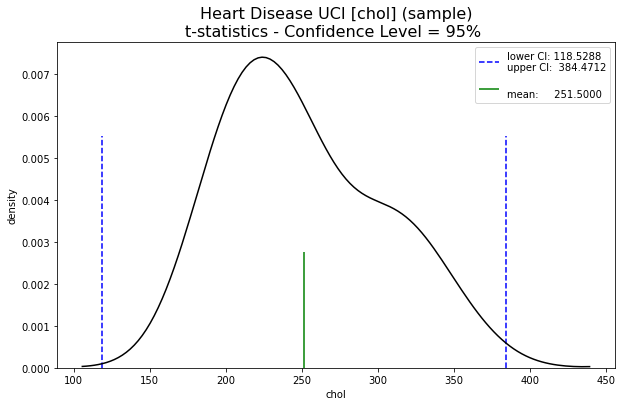

T-Statistics - CONCLUSION:
Based on a sample of 20 patients, 95% of the patients in the Heart Disease UCI dataset will have cholesterol levels between 118 and 385.


In [11]:
plt.figure(figsize=(10,6))
plt.title('Heart Disease UCI [chol] (sample)\nt-statistics - Confidence Level = {:.0%} '.format(confidenceLevel), fontsize=16)
plt.ylabel('density')

labelCI=("lower CI: {:.4f}\nupper CI:  {:.4f}".format(lowerCI,upperCI))
labelME=("\nmean:     {:.4f}".format(mean))
plt.vlines([lowerCI,upperCI],0,np.mean(stats.norm.pdf(heart_chol_sample, loc=mean, scale=s)),label=labelCI,color='blue',ls='--')
plt.vlines(mean,0,np.mean(stats.norm.pdf(heart_chol_sample, loc=mean, scale=s)*.5),label=labelME,color='green')
plt.legend(loc='best')

sns.distplot(heart_chol_sample, hist=False, color='k')
plt.show()


print("T-Statistics - CONCLUSION:")
print("Based on a sample of {} patients, {:.0%} of the patients in the Heart Disease UCI dataset will have cholesterol levels between {} and {}.".format(len(heart_chol_sample),confidenceLevel, math.floor(lowerCI), math.ceil(upperCI)))

[go to top of section](#over)<br>
[go to top](#top)<br>

---
<a id="desc"></a>
#  2.  Descriptive Statistics
**DESCRIPTIVE STATISTICS** is a form of analysis that is used for describing, summarizing, or showing the data in a meaningful way, and describes the following properties:
*  **distribution** - sample or population
*  **measure of central tendency** - or location, seeks to characterize the distribution's central or typical value 
*  **measure of dispersion** - or variability or spread, characterizes the extent to which members of the distribution depart from its center and each other

[1.1  Distribution](#desc_fdt) - distribution table and plots<br>
[1.2  Measure of Central Tendency](#desc_cent) - mean, median, mode, skew and kurtosis<br>
[1.3  Measure of Dispersion](#desc_disp) - variance and standard deviation<br>
[1.4  Covariance](#desc_covar)<br>
[1.5  Correlation Coefficient](#desc_corr)<br>

| **symbols** | **description** | **symbols** | **description**   |
| :--- | :--- | :--- | :--- |
| $\mathsf{\large N}$     |  population size | $\mathsf{\large g}$ | skewness |
| $\mathsf{\large n}$     |  sample size |  $\mathsf{\large \beta_2}$ | kurtosis |
| $\mathsf{\large \mu}$     |  population mean | | |
| $\mathsf{\large \bar{x}}$     |  sample mean | | |
| $\mathsf{\large \sigma^2}$ | population variance | $\mathsf{\large \sigma_{xy}}$ | population covariance |
| $\mathsf{\large s^2}$ | sample variance |  $\mathsf{\large s_{xy}}$ | sample covariance |
| $\mathsf{\large \sigma}$ | population standard deviation | $\mathsf{\large \rho_{xy}}$ | population correlation |
| $\mathsf{\large s}$ | sample standard deviation | $\mathsf{\large r_{xy}}$ | sample correlation |
| $\mathsf{\large x_i}$  |  observation |

[go to top of section](#desc)
<a id="desc_fdt"></a>
##  2.1	Frequency Distribution Table
**Frequency Distribution Table** is one of the simplest ways to get an overview of the distribution of data.   Frequency Distribution Plots, such as histogram, density and box plots, are also great tools to visually represent the data.

- **Frequency Distribution Table** is a summary of the values and their absolute and relative frequencies
- **Frequency Distribution Plots:**
    - **Histogram** is a visual representation of the discrete distribution of the numerical data
    - **Density Plot** is a visual representation of the continuous distribution of the numerical data
    - **Boxplot** is a graph that gives you a good indication of how the values in the data are spread out

**Heart Disease UCI - AGE, Frequency Distribution Table:**:

In [12]:
#  Heart Disease UCI [Age ]
#  frequency distribution table
interval_range = pd.interval_range(start=0, end=100, freq=10)
age_ranges = heart['age'].value_counts(bins = interval_range).sort_values()

freq = pd.DataFrame()
freq['Age'] = age_ranges.index
freq['Absolute Frequency'] = age_ranges.values
freq['Relative Frequency, %'] = round(freq['Absolute Frequency']*100/len(heart['age']),4)
freq = freq.sort_values(by = ['Age']).reset_index(drop=True)

totals_row = {'Age':'-total-', 'Absolute Frequency':freq['Absolute Frequency'].sum(), 'Relative Frequency, %':freq['Relative Frequency, %'].sum()}
freq = freq.append(totals_row, ignore_index=True)

freq

,Age,Absolute Frequency,"Relative Frequency, %"
0,"(0, 10]",0,0.0000
1,"(10, 20]",0,0.0000
2,"(20, 30]",1,0.3300
3,"(30, 40]",18,5.9406
4,"(40, 50]",76,25.0825
5,"(50, 60]",129,42.5743
6,"(60, 70]",73,24.0924
7,"(70, 80]",6,1.9802
8,"(80, 90]",0,0.0000
9,"(90, 100]",0,0.0000


**Frequency Distribution Plots:**
- histogram
- density plot
- boxplot

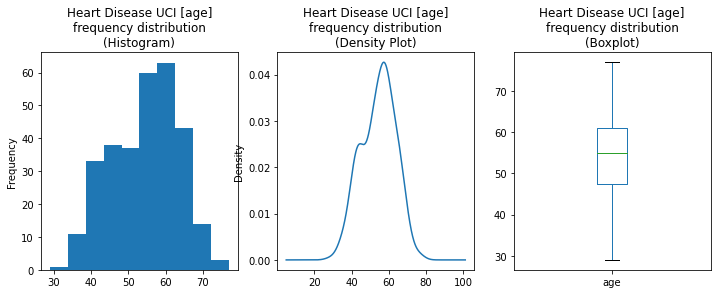

In [13]:
#  Frequency Distribution Plots
fig = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.title('Heart Disease UCI [age]\nfrequency distribution\n(Histogram)')
heart['age'].plot(kind='hist')

plt.subplot(132)
plt.title('Heart Disease UCI [age]\nfrequency distribution\n(Density Plot)')
heart['age'].plot(kind='kde')

plt.subplot(133)
plt.title('Heart Disease UCI [age]\nfrequency distribution\n(Boxplot)')
heart['age'].plot(kind='box')
plt.show()

**Boxplot Details:**

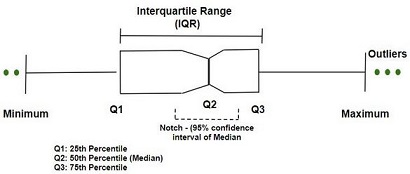

|  boxplot | description |
| :--- | :--- |
| Q1  | first quartile, 25th percentile |
| Q2  | second quartile, 50th percentile, median |
| Q3  | third quartile, 75th percentile |
| IQR | interquartile range, Q1 to Q3 |
| minimum (bar at end) | Q1+1.5$ \times$IQR |
| maximum (bar at end) | Q3+1.5$\times$IQR |
| dots | outliers |

[go to top of section](#desc)
<a id="desc_cent"></a>
##  2.2	Measure of Central Tendency
Measure of Central Tendency, or Central Tendency, is a central or typical value for a probability distribution and are often called averages.  Measure of Central Tendency is defined by the mean, median, mode, skew and kurtosis of the distribution.

###  2.2.1 Mean
**Mean**  is the simple average and is easily affected by outliers.  It is given by:
\begin{align*} 
\mathsf{ \text{Population Mean:}  \quad \mu = \frac{\sum_{i=1}^N x_i}{N} \\\\
\text{Sample Mean:}  \quad \bar{x} = \frac{\sum_{i=1}^n x_i}{n}}
\end{align*}

###  2.2.2 Median
**Median**  is the number at position (n+1)/2 in an ordered (sorted) list and is not affected by outliers.

###  2.2.3 Mode
**Mode**  is the number value that occurs the most in a dataset.  A dataset can have a single mode or multiple modes.  Large datasets having two or more  modes is common.

###  2.2.4 Skew
**Skew** indicates whether the observations in a dataset are concentrated on one side, and is given by:
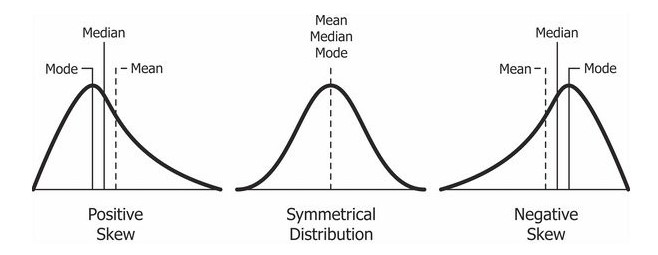


$$\mathsf{ \text{Skew:} \quad g = \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^3}{(n - 1)\sigma^3}}$$


-  **skewness = 0** denotes a **symmetrical** distribution of values
-  **skewness < 0** indicates a **negative** asymmetrical distribution corresponding to a larger tail towards the left-hand side of the distribution
-  **skewness > 0** indicates a **positive** asymmetrical distribution corresponding to a larger tail  towards the right-hand side of the distribution

###  2.2.5 Kurtosis
**Kurtosis** is a measure of the fatness in the tails and tells us the extent to which the distribution is more or less outlier-prone (heavier or light-tailed) than the normal distribution.
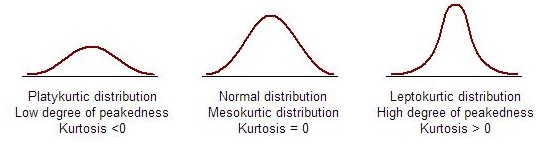

$$\mathsf{\text{Kurtosis:} \quad \beta_2 = E \left[ \left( \frac{X-\mu}{\sigma}\right)^4 \right]}$$

*  **Mesokurtic Curve**   - normal curve.  distribution is **symmetrical**
*  **Leptokurtic Curve**  - distribution is **more outlier** prone (or heavier-tailed) than a normal curve
*  **Platykurtic Curve**  - distribution is **less outlier** prone (or lighter-tailed) than a normal curve



<br>SIDENOTE:  In statistics, the **Moments of Distribution** are defined as:

| **moment ordinal** | **moment** |
| :--- | :--- |
|first | mean |
|second | variance |
|third | skewness |
|fourth | kurtosis |

<a id="examp_cent"></a>
###  2.2.6  Python Example: Descriptive Statistics - Central Tendencies
Following example will:
1.  create dataframe with three attributes
2.  plot density curves
3.  calculate descriptive statistics - central tendencies

note:  data is specifically created to demonstrate skewness.

In [14]:
#  create data frame from tuples
x = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20)
y = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,44,66,66,44,19,20)
z = (-20,-19,-44,-66,-66,-44,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1)

df = pd.DataFrame({'x': x,'y':y,'z':z})
df.transpose()  # print dataframe transpose

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
x,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
y,1,2,3,4,5,6,7,8,9,10,11,12,13,14,44,66,66,44,19,20
z,-20,-19,-44,-66,-66,-44,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1


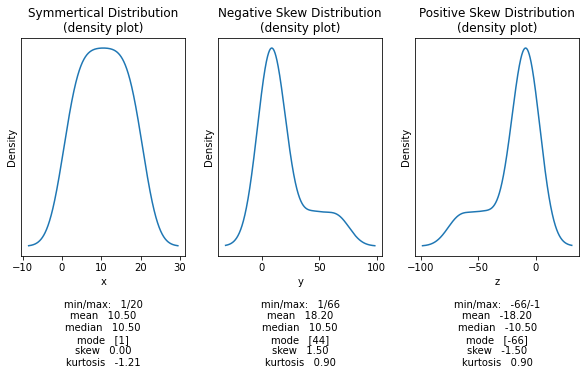

In [15]:
#  function - print central tendencies values
def getCT(*args):
    for i in args:
        a =  "min/max:   {:,.0f}/{:,.0f}\n".format(min(i),max(i))
        a += "mean   {:,.2f}\n".format(np.mean(i))
        a += "median   {:,.2f}\n".format(np.median(i))
        a += "mode   {}\n".format(stats.mode(i)[0])
        a += "skew   {:,.2f}\n".format(stats.skew(i))
        a += "kurtosis   {:,.2f}".format(stats.kurtosis(i))
    return a


#  density plots of the distributions
fig = plt.figure(figsize=(10,4))
plt.subplot(131)
x_label = getCT(df.x)
plt.title('Symmertical Distribution\n(density plot)')
plt.xlabel("x\n\n{}".format(x_label))
plt.yticks([])
df.x.plot(kind='kde')   #  skew = 0, symmetric

plt.subplot(132)
x_label = getCT(df.y)
plt.title('Negative Skew Distribution\n(density plot)')
plt.xlabel("y\n\n{}".format(x_label))
plt.yticks([])
df.y.plot(kind='kde')   #  skew < 0, left- hand side tail

plt.subplot(133)
x_label = getCT(df.z)
plt.title('Positive Skew Distribution\n(density plot)')
plt.xlabel("z\n\n{}".format(x_label))
plt.yticks([])
df.z.plot(kind='kde')   #  skew > 0, right-hand side tail
plt.show()

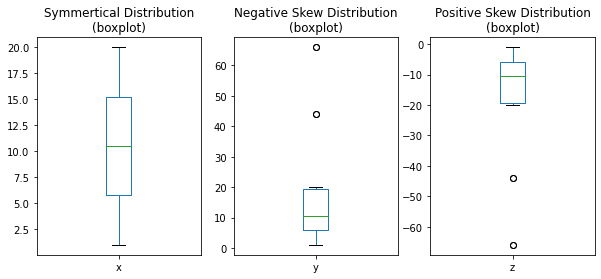

In [16]:
#  boxplots plots of the distributions
fig = plt.figure(figsize=(10,4))
plt.subplot(131)
plt.title('Symmertical Distribution\n(boxplot)')
df.x.plot(kind='box')   #  skew = 0, symmetric

plt.subplot(132)
plt.title('Negative Skew Distribution\n(boxplot)')
df.y.plot(kind='box')   #  skew < 0, left- hand side tail

plt.subplot(133)
plt.title('Positive Skew Distribution\n(boxplot)')
df.z.plot(kind='box')   #  skew > 0, right-hand side tail
plt.show()

[go to top of section](#desc)
<a id="desc_disp"></a>
##  2.3	Measure of Dispersion
**Measure of Dispersion** shows the extent to which a numerical data is likely to vary about an average value and helps us to understand the distribution of the data.  Measure of Dispersion is defined by the variance and standard deviation of the distribution.

###  2.3.1 Variance
**Variance** measures the dispersion of a set of datapoints around their mean values.  In most cases the figure for variance is pretty large and hard to compare as the unit of measurement is squared.  It is given by:

\begin{align*} 
\mathsf{\text{Population Variance:} \quad \sigma^2= \frac{\sum_{i=1}^N (x_i-\mu)^2}{N} \\\\
\text{Sample Variance:} \quad s^2 = \frac{\sum_{i=1}^n (x_i- \bar{x})^2}{n-1}}
\end{align*}

###  2.3.2  Standard Deviation
**Standard Deviation** is the most common measure of variability for a single dataset and is simply the square root of variance.  Units of standard deviation are the same as dataset.

\begin{align*} 
\mathsf{\text{Population Standard Deviation:} \quad \sigma
\\\\
\text{Sample Standard Deviation:} \quad s}
\end{align*}

###  2.3.3  Coefficient of Variance
**Coefficient of Variance**, or **Relative Standard Deviation**, is the standard deviation divided by the mean.  Comparing the standard deviations of two different datasets is meaningless.  But comparing coefficients of variation is not.  Coefficient of variance has no units.

\begin{align*} 
\mathsf{\text{Population Coefficient of Variance:} \quad c_v = \frac{\sigma}{\mu}
\\\\
\text{Sample Coefficient of Variance:} \quad \hat{c}_v = \frac{s}{\bar{x}}}
\end{align*}

<a id="examp_disp"></a>
###  2.3.4 Python:  Descriptive Statistics - Dispersion
Following python code example will:
1.  use dataframe with three attributes from previous example
2.  calculate descriptive statistics - dispersion

In [17]:
print(f"\n{'POPULATION - Dispersion for df.x'}",
      f"\n{'Population Variance:':<35}{statistics.pvariance(df.x):>10,.4f}",
      f"\n{'Population Standard Deviation':<35}{statistics.pstdev(df.x):>10,.4f}",
      f"\n{'Population Coefficient of Variance:':<35}{statistics.pstdev(df.x)/np.mean(df.x):>10,.4f}",
    
      f"\n\n{'SAMPLE - Dispersion for df.x'}",
      f"\n{'Sample Variance:':<35}{statistics.variance(df.x):>10,.4f}",
      f"\n{'Sample Standard Deviation':<35}{statistics.stdev(df.x):>10,.4f}",
      f"\n{'Sample Coefficient of Variance:':<35}{statistics.stdev(df.x)/np.mean(df.x):>10,.4f}")


POPULATION - Dispersion for df.x 
Population Variance:                  33.2500 
Population Standard Deviation          5.7663 
Population Coefficient of Variance:    0.5492 

SAMPLE - Dispersion for df.x 
Sample Variance:                      35.0000 
Sample Standard Deviation              5.9161 
Sample Coefficient of Variance:        0.5634


[go to top of section](#desc)
<a id="desc_covar"></a>
##  2.4	Covariance
Covariance measures the total variation of **two random variables** from their expected values. Using covariance, we can only gauge the direction of the relationship (whether the variables tend to move in tandem or show an inverse relationship). However, it does not indicate the strength of the relationship, nor the dependency between the variables.

-	**> 0**	- the two variables tend to move in the **same direction**<br>
-	**< 0**	- the two variables tend to move in **inverse directions**<br>
-	**= 0**	- the two variables are **independent** of each other<br>

\begin{align*} 
\mathsf{ \text{Population Covariance:} \quad \sigma_{xy}= \frac{\sum_{i=1}^N (x_i-\mu_x)(y_i-\mu_y)}{N} \\\\
\text{Sample Covariance:}  \quad s_{xy} = \frac{\sum_{i=1}^n (x_i- \bar{x})(y_i-\bar{y})}{n-1}}
\end{align*}

<a id="examp_covar"></a>

In [18]:
df.cov()  #  covariance

,x,y,z
x,35.000000,83.368421,83.368421
y,83.368421,407.115789,194.147368
z,83.368421,194.147368,407.115789


Interpreting covariance is difficult since the values are not scale dependent and do not have any upper or lower bounds. This is where correlation comes in.

[go to top of section](#desc)
<a id="desc_corr"></a>
##  2.5	Correlation Coefficient
Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:

-	**+1**	- indicates a strong positive relationship.  Perfect positive correlation
-	**-1**	- indicates a strong negative relationship.  Perfect negative correlation
-	  **0**	- no relationship at all.  Absolutely independent variables.  A common practice is to disregard correlations that are below zero point 0.2

\begin{align*} 
\mathsf{ \text{Population Correlation:} \quad \rho_{xy}= \frac{\sigma_{xy}}{\sigma_x \sigma_y} = \frac{COV(x,y)}{stdev(x) * stdev(y)} \\\\
\text{Sample Correlation:} \quad r_{xy}= \frac{s_{xy}}{s_x s_y} = \frac{COV(x,y)}{stdev(x) * stdev(y)}}
\end{align*}

The Correlation Coefficient has several advantages over covariance for determining strengths of relationships:

- Covariance can take on practically any number while a correlation is limited: -1 to +1.
- Correlation does not have units. Covariance always has units
- Correlation isn’t affected by changes in the center (i.e. mean) or scale of the variables
- Correlation is completely symmetrical with respect to both variables.  Correlation between x & y is the same as correlation between y & x
- **Correlation does not imply causation**

<a id="examp_corr"></a>

In [19]:
df.corr()   #  correlation

,x,y,z
x,1.000000,0.698407,0.698407
y,0.698407,1.000000,0.476885
z,0.698407,0.476885,1.000000


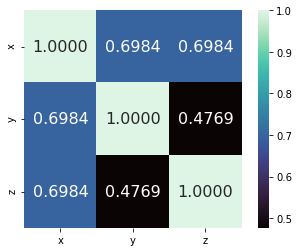

In [20]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 16}, fmt='.4f', square=True, cmap='mako')

[go to top of section](#desc)<br>
[go to top](#top)<br>

---
<a id="over"></a>
#  3.  Miscellaneous Statistics Topics
Statistics is the science concerned with developing and studying methods for collecting, analyzing, interpreting and presenting empirical data. Statistics is a highly interdisciplinary field; research in statistics finds applicability in virtually all scientific fields and research questions in the various scientific fields motivate the development of new statistical methods and theory.

Before be dive into statistics, lets cover some basic topics:

[1.1  Data, Information, Knowledge, Wisdom](#over_data)<br>
[1.2  Types of Statistics](#over_stat)<br>
[1.3  Population and Sample](#over_pop)<br>
[1.4  Types of Data](#over_type)<br>
[1.5  Levels of Measurements of Data](#over_meas)<br>
[1.6  Types of Distributions](#over_dist)

<a id="over_data"></a>
##  3.1	Data, Information, Knowledge, Wisdom (DIKW)
Information consists of data, but data is not necessarily information. Also, wisdom is knowledge, which in turn is information, which in turn is data, but, for example, knowledge is not necessarily wisdom. So, wisdom is a subset of knowledge, which is a subset of information, which is a subset of data.

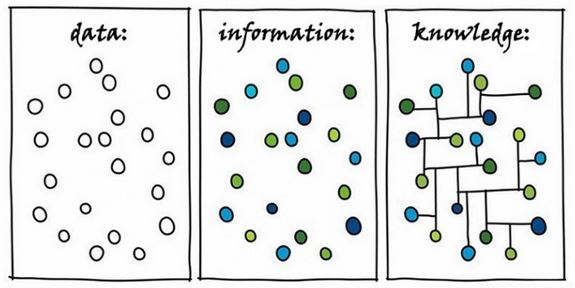
•	**Data** - information, for example, numbers, text, images, and sounds, in a form that is suitable for storage in or processing by a computer, used as a basis for making calculations or drawing conclusions<br>
•	**Information** - data that has been organized and presented in a systematic fashion to clarify the underlying meaning<br>
•	**Knowledge** - awareness or possession of information, facts, ideas, truths, or principles, understanding gained through experience or study<br>

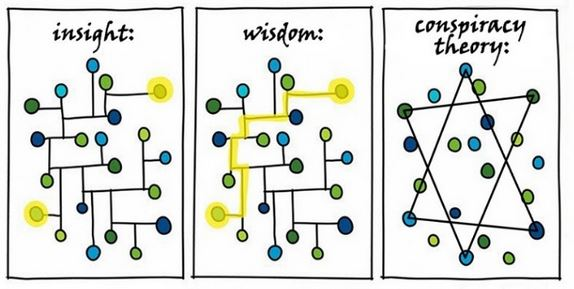
•	**Insight** - an understanding of relationships that sheds light on or helps solve a problem<br>
•	**Wisdom** - knowledge and experience needed to make sensible decisions and judgments<br>
•	**Conspiracy Theory** - a theory that rejects the standard explanation for an event and instead credits a covert group or organization with carrying out a secret plot<br>

[go to top of section](#over)
<a id="over_stat"></a>
##  3.2  Types of Statistics

This notebook only covers descriptive and inferential statistical analysis, but it's worthwhile to mention other types on analysis.  There are the six types of analyses for data science, from the least to most complex, in terms of knowledge, costs, and time.


### 3.2.1  Descriptive Statistics
The discipline of quantitatively describing the main features of a collection of data. In essence, it describes a set of data (least amount of effort)

*  Typically, the first kind of data analysis performed on a data set
*  Commonly applied to large volumes of data, such as census data
*  Univariate and Bivariate are two types of statistical descriptive analyses
*  Type of data set applied to: Census Data Set – a whole population

### 3.2.2  Exploratory Statistics
An approach to analyzing data sets to find previously unknown relationships.

*  Exploratory models are good for discovering new connections
*  They are also useful for defining future studies/questions
*  Exploratory analyses are usually not the definitive answer to the question at hand, but only the start
*  Exploratory analyses alone should not be used for generalizing and/or predicting

### 3.2.3  Inferential Statistics
Aims to test theories about the nature of the world in general (or some part of it) based on samples of “subjects” taken from the world (or some part of it). That is, use a relatively small sample of data to say something about a bigger population.

*  Inference is commonly the goal of statistical models
*  Inference involves estimating both the quantity you care about and your uncertainty about your estimate
*  Inference depends heavily on both the population and the sampling scheme

### 3.2.4  Predictive Statistics
The various types of methods that analyze current and historical facts to make predictions about future events. In essence, to use the data on some objects to predict values for another object.

*  The models predict, but it does not mean that the independent variables cause
*  Accurate prediction depends heavily on measuring the right variables
*  Although there are better and worse prediction models, more data and a simple model works really well
*  Prediction is very hard, especially about the future references

### 3.2.5  Causal Statistics
To find out what happens to one variable when you change another.

*  Implementation usually requires randomized studies
*  There are approaches to inferring causation in non-randomized studies
*  Causal models are said to be the “gold standard” for data analysis

### 3.2.6  Mechanistic Statistics
Understand the exact changes in variables that lead to changes in other variables for individual objects (most amount of effort).

*  Incredibly hard to infer, except in simple situations

[go to top of section](#over)
<a id="over_pop"></a>
##  3.3  Population and Sample
Any data being analyzed must first be identified as population (all the data, "N") or sample (subset of the data, "n").

###  3.3.1	Population - N
Population (N) is a collection of all items of interest and the numbers obtained are called parameters.  Populations are hard to define/observe and hard to observe in real life.  In a population, each data point is known and all measurements are 100% accurate.  

$\mathsf{\qquad \text{Population mean:}\qquad \large \mu = \frac{\sum_{i=1}^N x_i}{N}}$

###  3.3.2	Sample - n
Sample (n) is a subset of the population and the numbers in a sample are called **statistics**.  Samples are less time consuming and less costly to gather.  They are key to accurate statistical analysis.  They have two key characteristics:

* **randomness** – a random sample is collected when each member of the sample is chosen from the population strictly by chance
* **representativeness** – a representative sample is a subset of the population that accurately reflects the members of the entire population

Samples are an approximation of the population and each measurement of various samples will result in different results.  

$\mathsf{\qquad \text{Sample mean:}\qquad \large \bar{x} = \frac{\sum_{i=1}^n x_i}{n}}$

[go to top of section](#over)
<a id="over_type"></a>
##  3.4  Types of Data
Data Types are an important concept of statistics, which needs to be understood, to correctly apply statistical measurements to your data and therefore to correctly conclude certain assumptions about it.

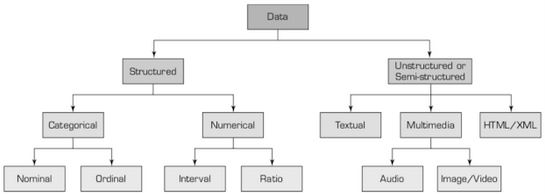

###  3.4.1	Categorical 
Categorical data represents characteristics, and are values or observations that can be sorted into groups or categories.  Bar charts, histograms and pie graphs are used to graph categorical data.

*	**NOMINAL** values represent discrete units and are used to label variables, that have no quantitative value. Just think of them as “labels”. You can count but not order or measure nominal data.   Examples: Sex, and eye color.
*	**ORDINAL** values or observations can be ranked (put in order) or have a rating scale attached. You can count and order, but not measure, ordinal data. Example: house numbers and swimming level.

###  3.4.2	Numerical 
Numerical values or observations that can be measured, and placed in ascending or descending order.  Scatter plots and line graphs are used to graph numerical data.

*	**DISCRETE** values or observations that are counted as distinct and separate and can only take particular values. They cannot be measured.  Examples: number of threads in a sheet, number of stars given for an energy rating.
*	**CONTINUOUS** data represents measurements and therefore their values can’t be counted but they can be measured.  Values or observations may take on any value within a finite or infinite interval. Examples: height, time and temperature.

[go to top of section](#over)
<a id="over_meas"></a>
##  3.5  Levels of Measurements
In descending order of precision, the four different levels of measurement are nominal, ordinal, interval and ratio.

|  **MEASUREMENT**   | 	**MEASURE PROPERTY**   |  **OPERATORS**   |  **OPERATIONS**   |  **CENTRAL TENDENCY**   | 
| :--- | :--- | :---: | :--- | :--- |
| **NOMINAL** 	| classification, membership 	| =, ≠ 	| grouping 	| mode |
| **ORDINAL** 	| comparison, level 	| >, < 	| sorting 	| median |
| **INTERVAL** 	| difference, affinity 	| +, − 	| yardstick 	| mean, deviation | 
| **RATIO** 	| magnitude, amount 	| ×, / 	| ratio 	| mean, coefficient of variation |

###  3.5.1	Qualitative (quality)
Qualitative –think data is being measured on quantity, can be categorized.

*  **Nominal** – Latin for name only (Republican, Democrat, Green, Libertarian).  Cannot be ordered, categories, car brands, seasons, IDs, language
*  **Ordinal** – Think ordered levels or ranks (small–8oz, medium–12oz, large–32oz).  Can be ordered, categories, bad/good

###  3.5.2	Quantitative (quantity)
Qualitative – data is being measured on quantity - infinite amount of values, weight, money, height, area, time, distance, time in general

*  **Interval** – Equal intervals among levels (1 dollar to 2 dollars is the same interval as 88 dollars to 89 dollars).  does not have a true ZERO, temperature
*  **Ratio** – Let the “o” in ratio remind you of a zero in the scale (Day 0, day 1, day 2, day 3, …).  Has a true ZERO, weight, number of objects, distance, time, temperature in Kelvin, age

[go to top of section](#over)
<a id="over_dist"></a>
##  3.6  Types of Distributions
A probability distribution is a formula or a table used to assign probabilities to each possible value of a random variable X, and can be either **discrete** or **continuous**:
*  **discrete distribution** means that X can assume one of a countable (usually finite) number of values
*  **continuous distribution** means that X can assume one of an infinite (uncountable) number of different values

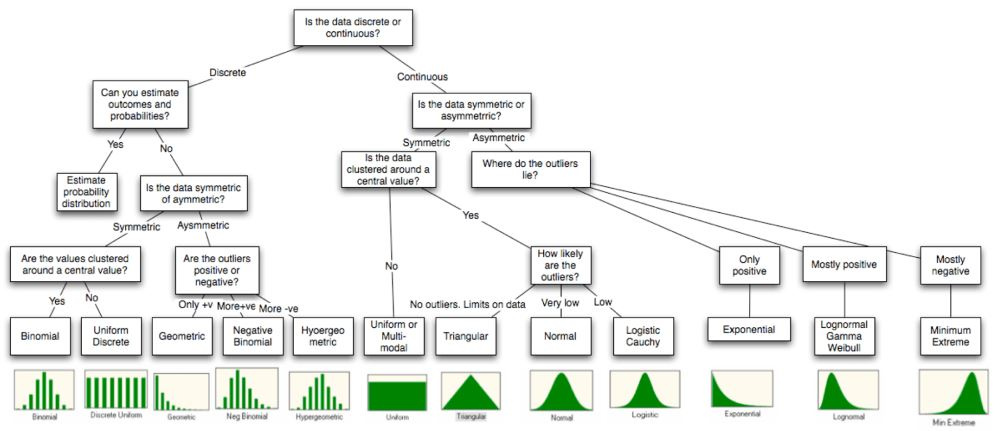

|  **DISCRETE DISTRIBUTIONS** 	|  **CONTINUOUS DISTRIBUTION** |
| :---- | :---- |
| Discrete distributions have finite number of different possible outcomes 	| Continuous distributions have infinite many consecutive possible values |
| We can add up individual values to find out the probability of an interval 	| We cannot add up individual values to find out the probability of an interval because there are many of them |
| Discrete distributions can be expressed with a graph, piece-wise function or table 	| Continuous distributions can be expressed with a continuous function or graph |
| In discrete distributions, graph consists of bars lined up one after the other 	| In continuous distributions, graph consists of a smooth curve |
| Expected values might not be achievable 	| To calculate the chance of an interval, we required integrals  |

<br>source:  https://databasetown.com/types-probability-distribution-characteristics-examples/

[go to top of document](#top)   

---

# END

---